In [1]:
import tensorflow as tf
import os

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
import cv2
import imghdr

In [148]:
data_dir = 'data/binary_classification'   
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [149]:

data = tf.keras.utils.image_dataset_from_directory('data/binary_classification/')

Found 471 files belonging to 2 classes.


In [150]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

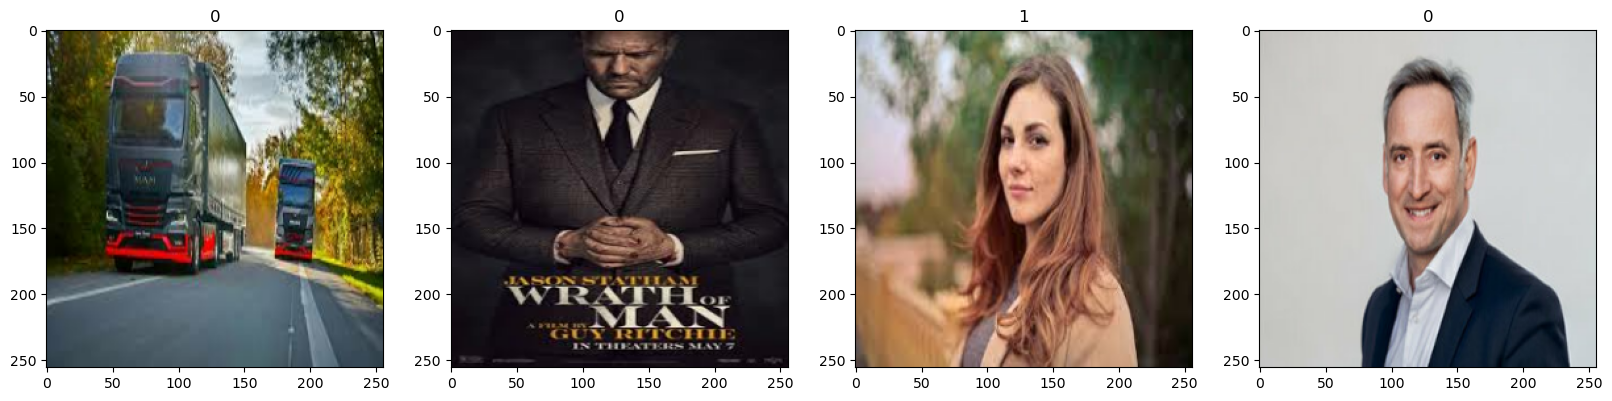

In [151]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [152]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          ...,
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01]],
 
         [[8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          ...,
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01]],
 
         [[8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          [8.00000012e-01, 8.00000012e-01, 8.00000012e-01],
          ...,
          [8.00000012e-01, 8.00000012e-01, 8.0000

In [153]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [154]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [155]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [157]:
model = Sequential()

In [158]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [159]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [160]:

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 16)      

In [161]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
10/10 [==============================] - 12s 996ms/step - loss: 1.5133 - accuracy: 0.4812 - val_loss: 0.6905 - val_accuracy: 0.5417
Epoch 2/20
10/10 [==============================] - 14s 1s/step - loss: 0.6913 - accuracy: 0.5531 - val_loss: 0.6798 - val_accuracy: 0.5312
Epoch 3/20
10/10 [==============================] - 16s 1s/step - loss: 0.6643 - accuracy: 0.5938 - val_loss: 0.6581 - val_accuracy: 0.7604
Epoch 4/20
10/10 [==============================] - 14s 1s/step - loss: 0.6582 - accuracy: 0.7688 - val_loss: 0.5690 - val_accuracy: 0.7708
Epoch 5/20
10/10 [==============================] - 16s 1s/step - loss: 0.5835 - accuracy: 0.6687 - val_loss: 0.5300 - val_accuracy: 0.6979
Epoch 6/20
10/10 [==============================] - 15s 1s/step - loss: 0.5020 - accuracy: 0.8125 - val_loss: 0.4437 - val_accuracy: 0.7917
Epoch 7/20
10/10 [==============================] - 15s 1s/step - loss: 0.3890 - accuracy: 0.8500 - val_loss: 0.2504 - val_accuracy: 0.9271
Epoch 8/20
10/10 

In [174]:
import cv2

# Start video capture
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise Exception("Could not open video device")

# Capture a frame
ret, frame = cap.read()

# Check if frame is captured correctly
if not ret:
    raise Exception("Could not capture frame")

# Save the frame
cv2.imwrite("kedar1.jpg", frame)

# Release the video capture object
cap.release()


In [175]:
img = cv2.imread('kedar1.jpg')

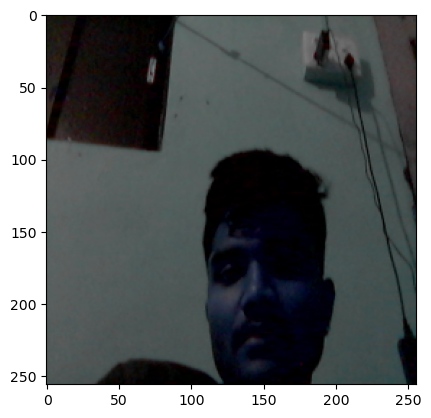

In [171]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [177]:
yhat = model.predict(np.expand_dims(resize/255, 0))

if yhat > 0.5: 
    print(f'Predicted class is Man')
else:
    print(f'Predicted class is Woman')

1/1 [==============================] - 0s 31ms/step
Predicted class is Man
